<style>
    .output {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
<center>
    <h1> INF390 - Análisis Inteligente de Datos </h1>
    <h1> Tarea 2 - Machine Learning con Python </h1>
    <h3>
        <table style="border: 0px;">
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> Sebastián Aedo</td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> Diego Córdova </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> 201573057-1 </td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> 2014xxxxx-9 </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; font-size: 14px; border: 0px;"> <code>sebastian.aedo@sansano.usm.cl </code></td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; font-size: 14px; border: 0px;"><code>diego.cordova@sansano.usm.cl</code> </td>
            </tr>
        </table>
    </h3> 
    <h4> Valparaíso, Viernes 8 de Diciembre de 2017 </h4>
</center>

## Tabla de contenidos

* [Clustering](#1.-Clustering)
    * [Hepatitis](#Hepatitis)
    * [Diabetes](#Diabetes)

In [1]:
import numpy as np
import time

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score      
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import cluster # Técnica de Clustering
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pcasvd

import seaborn as sns
%matplotlib inline

In [2]:
# Diabetes Dataset

vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

# 1. Clustering

A continuación se aplicarán tres técnicas de clustering a los tres dataset presentados. Las tres técnicas a utilizar serán

1. Average Linkage
2. K-Means
3. Ward

Luego de aplicar cada algoritmo, se hará una breve comparación entre todos los métodos.

## Hepatitis

A continuación se analizará el dataset de la hepatitis.

Dentro de este dataset se presentan principalmente valores booleanos, 
y la bilirrubina que parece ser una variable contínua, sin embargo,
en la descripción del dataset describen que es un valor **con lazos**, por lo que se podía 
**discretizar**. El objetivo de esta clasificación será intentar predecir la clase a partir
de los otros parámetros.

In [3]:
vector = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", 
          "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
          "PROTIME", "HISTOLOGY"]
hepatitis = read_csv('data/hepatitis.data', sep=',', names=vector, header=None)

In [4]:
hepatitis.info()
hepatitis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
AGE                155 non-null int64
SEX                155 non-null int64
STEROID            155 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


### Preparando el dataset

Se puede notar que los valores están como `1`, `2` ó `?`. Para manejarlo con mayor facilidad, se reemplazarán por `True`, `False` o `None` según corresponda.

In [5]:
boolean_columns = ["STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
     "SPIDERS", "ASCITES", "VARICES", 'HISTOLOGY']
for column in boolean_columns:
    type_data = {'1': False, '2': True, '?': None}
    hepatitis[column] = hepatitis[column].apply(lambda x: type_data[str(x)])

El Sexo se tratará como `M` ó `F`.

In [6]:
type_data = {'1': 'M', '2': 'F', '?': np.nan}
hepatitis['SEX'] = hepatitis['SEX'].apply(lambda x: type_data[str(x)])

In [7]:
type_data = {'1': 'Dead', '2': 'Alive', '?': None}
hepatitis['Class'] = hepatitis['Class'].apply(lambda x: type_data[str(x)])

Ahora se modificarán las otras variables reemplazando el `?` por `None`.

In [8]:
floats = ['BILIRUBIN', 'ALBUMIN']
integers = ['ALK PHOSPHATE', 'SGOT', 'PROTIME']

for column in floats:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')
    
for column in integers:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')

Luego, se procede a entrenar el clustering usando las variables contínuas

In [9]:
non_boolean = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']

In [10]:
# Esta función es un wrapper para obtener las métricas (y no tener que reescribir codigo)
def get_metrics(f):
    def function_wrapper(*args):
        X, labels_true, labels = f(*args)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        silhouette = metrics.silhouette_score(X, labels)
        if len(args) >= 3 and args[2]:
            print('Estimated number of clusters: %d' % n_clusters_)
            print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
            print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
            print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
            print("Adjusted Rand Index: %0.6f"
                  % metrics.adjusted_rand_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.6f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
        
            print("Silhouette Coefficient: %0.6f"
                  % silhouette)
    
        return (labels, silhouette)
    return function_wrapper

In [11]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=True):
    X = hepatitis.loc[:, cols].dropna()
    y = hepatitis.loc[X.index,'Class']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)


## Aplicando Clustering

### Average Linkage

A continuación se probará la técnica *Average Linkage* para encontrar clusters.

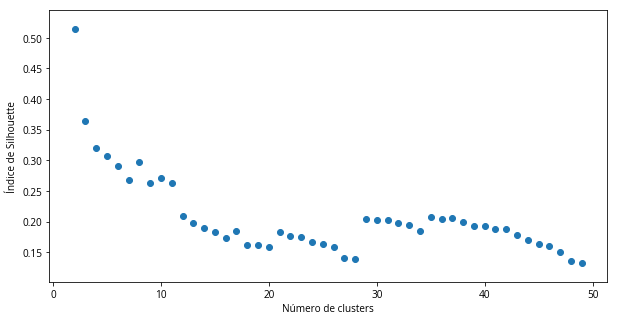

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [13]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.514280


En el caso de Average Linkage, 
se puede apreciar que el mejor cluster es cuando $K = 2$, lo que es normal ya que existen 2 clases.

###  K–Means

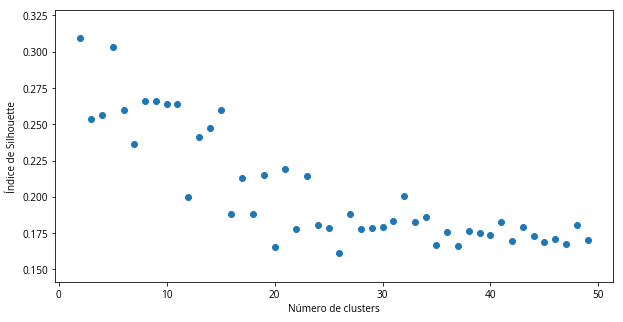

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [15]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.309205


### WARD

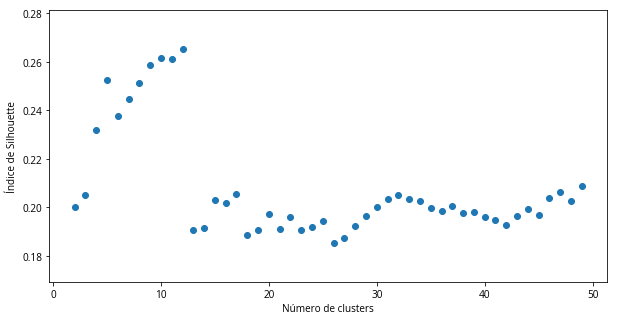

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [17]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 12 clusters: 0.265252


### Comparando

In [18]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.514280 | 0.309205 | 0.200179 |
| 3 | 0.364686 | 0.253419 | 0.205335 |
| 4 | 0.320942 | 0.256197 | 0.231897 |
| 5 | 0.306494 | 0.302939 | 0.252417 |
| 6 | 0.290457 | 0.260006 | 0.237633 |
| 7 | 0.267644 | 0.236586 | 0.244561 |
| 8 | 0.297599 | 0.266192 | 0.251493 |
| 9 | 0.262313 | 0.265786 | 0.258678 |
| 10 | 0.270839 | 0.264175 | 0.261399 |
| 11 | 0.262459 | 0.263972 | 0.261070 |
| 12 | 0.209826 | 0.199687 | 0.265252 |
| 13 | 0.197191 | 0.241270 | 0.190816 |
| 14 | 0.190371 | 0.247368 | 0.191629 |
| 15 | 0.182474 | 0.259526 | 0.203059 |
| 16 | 0.173258 | 0.187891 | 0.201662 |
| 17 | 0.184853 | 0.212881 | 0.205386 |
| 18 | 0.161977 | 0.188226 | 0.188802 |
| 19 | 0.161073 | 0.214997 | 0.190862 |
| 20 | 0.158099 | 0.165557 | 0.197462 |
| 21 | 0.183449 | 0.219469 | 0.191284 |
| 22 | 0.177183 | 0.177719 | 0.196251 |
| 23 | 0.175242 | 0.214215 | 0.190625 |
| 24 | 0.166405 | 0.180460 | 0.192070 |
| 25 | 0.163494 | 0.178266 | 0.194456 |
| 26 | 0.159252 | 0.160939 | 0.185501 |
| 27 | 0.141300 | 0.188117 | 0.187266 |
| 28 | 0.139699 | 0.177820 | 0.192313 |
| 29 | 0.204540 | 0.178449 | 0.196502 |
| 30 | 0.202788 | 0.179466 | 0.200317 |
| 31 | 0.202707 | 0.183071 | 0.203688 |
| 32 | 0.197594 | 0.200685 | 0.205297 |
| 33 | 0.194575 | 0.182312 | 0.203628 |
| 34 | 0.185361 | 0.185970 | 0.202616 |
| 35 | 0.208370 | 0.166734 | 0.199590 |
| 36 | 0.204676 | 0.175700 | 0.198577 |
| 37 | 0.205454 | 0.166345 | 0.200441 |
| 38 | 0.199393 | 0.176534 | 0.197568 |
| 39 | 0.192251 | 0.175158 | 0.198236 |
| 40 | 0.192274 | 0.173734 | 0.196258 |
| 41 | 0.187997 | 0.182608 | 0.194824 |
| 42 | 0.187946 | 0.169821 | 0.192851 |
| 43 | 0.177941 | 0.178991 | 0.196353 |
| 44 | 0.170116 | 0.172798 | 0.199334 |
| 45 | 0.163125 | 0.168545 | 0.196790 |
| 46 | 0.159685 | 0.170736 | 0.203726 |
| 47 | 0.150009 | 0.167597 | 0.206438 |
| 48 | 0.135982 | 0.180853 | 0.202744 |
| 49 | 0.133020 | 0.170151 | 0.208869 |



Como se puede apreciar en la tabla anterior, la que tuvo peor perfomance fue Ward, y la que mejor rindió en este caso fue Average Linkage.

## Diabetes

In [19]:
# Diabetes Dataset
vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

In [20]:
diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
TP         768 non-null int64
glucose    768 non-null int64
DBP        768 non-null int64
TSFT       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
DPF        768 non-null float64
age        768 non-null int64
status     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,TP,glucose,DBP,TSFT,insulin,mass,DPF,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En el caso de este dataset, las variables 0 no tienen sentido, por lo que serán reemplazadas por `NaN` ya que no contribuyen con la información.

In [21]:
diabetes.replace(0, np.nan);
valid_cols = diabetes.loc[:, :'age'].columns

In [22]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=True):
    X = diabetes.loc[:, cols].dropna()
    y = diabetes.loc[X.index,'status']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

### Average Linkage

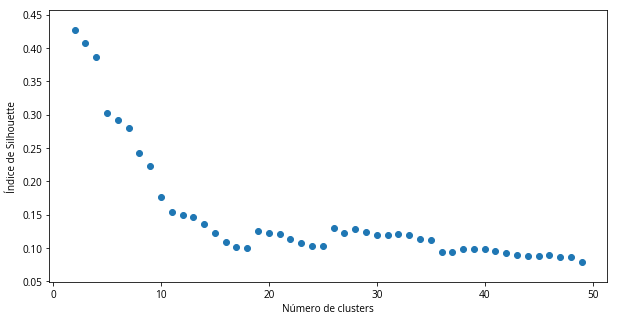

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [24]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.427439


### K-Means

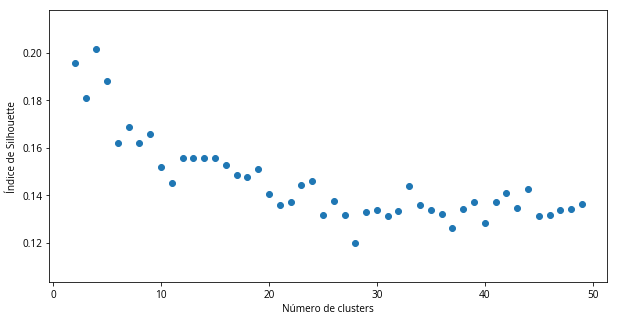

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [26]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 4 clusters: 0.201749


### Ward

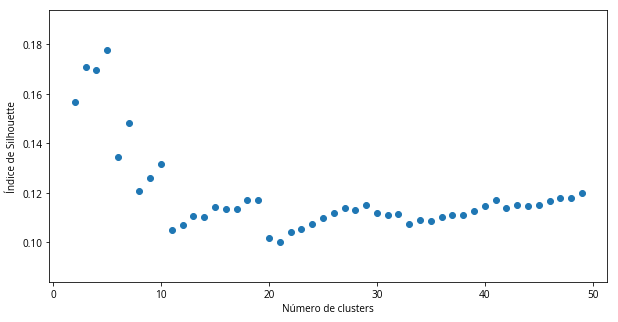

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [28]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 5 clusters: 0.177826


In [29]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.427439 | 0.195654 | 0.156755 |
| 3 | 0.407561 | 0.180771 | 0.170633 |
| 4 | 0.385828 | 0.201749 | 0.169487 |
| 5 | 0.303132 | 0.188273 | 0.177826 |
| 6 | 0.292418 | 0.162077 | 0.134541 |
| 7 | 0.279758 | 0.168819 | 0.148072 |
| 8 | 0.242812 | 0.161878 | 0.120666 |
| 9 | 0.222591 | 0.165766 | 0.125895 |
| 10 | 0.176943 | 0.151993 | 0.131581 |
| 11 | 0.154045 | 0.145068 | 0.105189 |
| 12 | 0.149088 | 0.155757 | 0.107171 |
| 13 | 0.145954 | 0.155790 | 0.110458 |
| 14 | 0.135795 | 0.155469 | 0.110430 |
| 15 | 0.121773 | 0.155632 | 0.114424 |
| 16 | 0.108665 | 0.152532 | 0.113633 |
| 17 | 0.101282 | 0.148623 | 0.113676 |
| 18 | 0.099696 | 0.147645 | 0.117147 |
| 19 | 0.124709 | 0.150837 | 0.117211 |
| 20 | 0.122618 | 0.140490 | 0.101784 |
| 21 | 0.120099 | 0.135998 | 0.100109 |
| 22 | 0.113223 | 0.137221 | 0.104125 |
| 23 | 0.107301 | 0.144445 | 0.105336 |
| 24 | 0.103163 | 0.146016 | 0.107624 |
| 25 | 0.102231 | 0.131715 | 0.109770 |
| 26 | 0.129967 | 0.137693 | 0.111788 |
| 27 | 0.121774 | 0.131648 | 0.113724 |
| 28 | 0.128059 | 0.119749 | 0.113029 |
| 29 | 0.123649 | 0.132923 | 0.115293 |
| 30 | 0.119641 | 0.133678 | 0.111744 |
| 31 | 0.118926 | 0.131176 | 0.111143 |
| 32 | 0.121376 | 0.133244 | 0.111385 |
| 33 | 0.118989 | 0.143654 | 0.107380 |
| 34 | 0.113821 | 0.135899 | 0.108948 |
| 35 | 0.112072 | 0.133833 | 0.108714 |
| 36 | 0.093907 | 0.132275 | 0.110050 |
| 37 | 0.094296 | 0.126309 | 0.111167 |
| 38 | 0.097776 | 0.133965 | 0.110859 |
| 39 | 0.098940 | 0.137157 | 0.112647 |
| 40 | 0.097888 | 0.128318 | 0.114890 |
| 41 | 0.095674 | 0.136942 | 0.117247 |
| 42 | 0.092463 | 0.140730 | 0.113799 |
| 43 | 0.089688 | 0.134525 | 0.114904 |
| 44 | 0.088434 | 0.142539 | 0.114785 |
| 45 | 0.087623 | 0.131232 | 0.115294 |
| 46 | 0.089073 | 0.131848 | 0.116855 |
| 47 | 0.086870 | 0.133957 | 0.117950 |
| 48 | 0.086762 | 0.133986 | 0.117900 |
| 49 | 0.078643 | 0.136367 | 0.119956 |



## Water Treatment

In [30]:
header = ['DATE', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P',
'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G',
'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

water = pd.read_csv('data/water-treatment.data', header=None)
water.columns = header

In [31]:
water.info()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
DATE        527 non-null object
Q-E         527 non-null object
ZN-E        527 non-null object
PH-E        527 non-null float64
DBO-E       527 non-null object
DQO-E       527 non-null object
SS-E        527 non-null object
SSV-E       527 non-null object
SED-E       527 non-null object
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       527 non-null object
SS-P        527 non-null int64
SSV-P       527 non-null object
SED-P       527 non-null object
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       527 non-null object
DQO-D       527 non-null object
SS-D        527 non-null object
SSV-D       527 non-null object
SED-D       527 non-null object
COND-D      527 non-null int64
PH-S        527 non-null object
DBO-S       527 non-null object
DQO-S       527 non-null object
SS-S        527 non-null object
SSV-S       527 non-null object


,DATE,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [32]:
for col in water.loc[:,'Q-E':].columns:
    water[col] = pd.to_numeric(water[col], errors='coerse')

In [33]:
valid_cols = list(water.loc[:, 'Q-E':].columns)

In [34]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=True):
    X = water.loc[:, cols].dropna()
    y = water.loc[X.index,'Class']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

KeyError: 'the label [Class] is not in the [columns]'

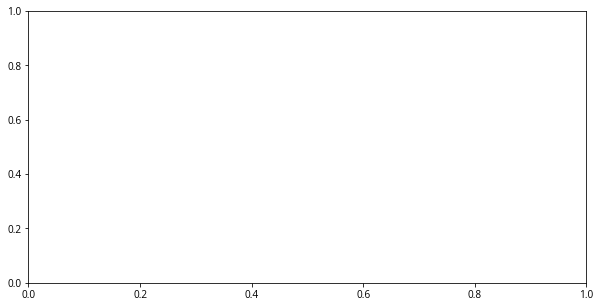

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");